# Laboratorio 6 - Análisis de redes sociales
- José Block
- Francisco Rosal
- Gian Luca Rivera

Para este laboratorio se decidió lidiar con el problema 3, con el lanzamiento de un producto. Decidimos utilizar el reciente lanzamiento del producto Tesla Bot de la empresa de Tesla.
Tesla es una empresa estadounidense liderada por Elon Musk, que diseña, fabrica y vende automoviles electricos, paneles solares, baterias domesticas. Recientemente, el 21 de agosto del 2021, anunciaron un nuevo producto: Tesla Bot, un robor humanoide de dos pedales de uso general capaz de realizar tareas que son inseguras, repetitivas o aburridas. Analizaremos el lanzamiento de este producto.

## Librerias

In [94]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob


## Datasets

El dataset de twitter lo obtuvimos por medio del archivo de código de get_data.py en donde, por medio de una cuenta developer obtuvimos los codigos de acceso al api de twitter y poder obtener los tweets relacionado a ciertos hashtags. Extrajimos los tweets que obtuvieran hashtags: #teslabot, #TeslaBot, #Teslabot, #TeslaAI, #TeslaAIBot.

El dataset de instagram se obtuvo por medio de la libreria de python 'instaloader' con la cual, al ser instalada, en la linea de comandos se hace sesión a una cuenta de instagram existente y luego se extraen los comentarios de un post por medio del id de ese post. Esto genera un json con la data de los comentarios de ese post que es el post de lanzamiento del Tesla Bot de Tesla.

In [95]:
tweets = pd.read_excel('tweets.xlsx')
instaComments = pd.read_json('instagram-comments.json')

In [96]:
tweets.head()

Tweet Id                                               Text  \
0  1434311496201236482  RT @TeslaAIBot : Is human extinction inevitabl...   
1  1434309779636178946  RT @TeslaAIBot : Is human extinction inevitabl...   
2  1434307859244802049  RT @TeslaAIBot : Is human extinction inevitabl...   
3  1434302910691782657  Working my ass off on this Labor Day weekend s...   
4  1434301867790585857  RT @TeslaBotties : FIRST 500 Discord member ge...   

                      Name     Screen Name                       UTC  \
0          Christia Caroro  CaroroChristia  2021-09-05T00:24:43.000Z   
1  Michael Spicer (he/him)    mycoolspicer  2021-09-05T00:17:54.000Z   
2                Optimus       TeslaAIBot  2021-09-05T00:10:16.000Z   
3                MOAR_HODL        MoarHodl  2021-09-04T23:50:36.000Z   
4                  Souhate        xouhater  2021-09-04T23:46:27.000Z   

                       Created At  Favorites  Retweets Language  \
0  Sun Sep 05 00:24:43 +0000 2021          0         0       en   
1  Sun Sep 05 00:17:54 +0000 2021          0         0       en   
2  Sun Sep 05 00:10:16 +0000 2021          0         0       en   
3  Sat Sep 04 23:50:36 +0000 2021          1         0       en   
4  Sat Sep 04 23:46:27 +0000 2021          0         0       en   

                                              Client Tweet Type  \
0  <a href="http://twitter.com/download/android" ...    Retweet   
1  <a href="http://twitter.com/download/android" ...    Retweet   
2  <a href="http://twitter.com/download/android" ...    Retweet   
3  <a href="http://twitter.com/download/iphone" r...      Tweet   
4  <a href="https://mobile.twitter.com" rel="nofo...    Retweet   

                             URLs  Hashtags  Mentions Media Type  \
0                             NaN         5         0        NaN   
1                             NaN         5         0        NaN   
2                             NaN         5         0        NaN   
3                             NaN         2         0        NaN   
4  https://discord.gg/uhVHWeGVMU          8         0      photo   

                                        Media URLs Unnamed: 16 Unnamed: 17  \
0                                              NaN         NaN         NaN   
1                                              NaN         NaN         NaN   
2                                              NaN         NaN         NaN   
3                                              NaN         NaN         NaN   
4  https://pbs.twimg.com/media/E-en7feXoAMWwqq.jpg         NaN         NaN   

  Unnamed: 18  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [97]:
instaComments.head()

id          created_at                              text  \
0  17884581686361219 2021-09-05 22:20:11               This can’t end well   
1  17914451887979639 2021-09-05 22:18:51                             credo   
2  18247939630040060 2021-09-05 22:18:41  Nahhhh this is the end bye y’all   
3  17986587886388599 2021-09-05 22:17:12          The beginning of the end   
4  18101257114266449 2021-09-05 22:15:30                         #bantesla   

                                               owner  likes_count answers  
0  {'id': '26991106797', 'is_verified': False, 'p...            0      []  
1  {'id': '48525992026', 'is_verified': False, 'p...            0      []  
2  {'id': '7042650650', 'is_verified': False, 'pr...            0      []  
3  {'id': '45683931428', 'is_verified': False, 'p...            0      []  
4  {'id': '41570330084', 'is_verified': False, 'p...            0      []

## Limpieza

Con esta función limpiamos el dataset por medio de la eliminación de stopwords, hipervinculos, caracteres especiales, emojis y pasamos todo el texto a minuscula.

In [98]:
def clean_data(text):
    stopW = set(stopwords.words('english'))
    text = text.lower()
    text = re.sub(r'http[s]?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'[^A-Za-z ]+', '', text)
    def remove_stopwords(text):
        textoken = word_tokenize(text)
        text = [word for word in textoken if word not in stopW]
        return " ".join(text)
    text1 = remove_stopwords(text)
    text = " ".join(text1.split())
    
    return text

Se lo aplicamos a ambos datasets unicamente a la columna de text que es la que contiene el contenido del comentario de instagram el dia de lanzamiento y en el otro caso, el contenido del tweet.

In [99]:
instaComments['text'] = instaComments['text'].apply(clean_data)
instaComments.head()

id          created_at                 text  \
0  17884581686361219 2021-09-05 22:20:11        cant end well   
1  17914451887979639 2021-09-05 22:18:51                credo   
2  18247939630040060 2021-09-05 22:18:41  nahhhh end bye yall   
3  17986587886388599 2021-09-05 22:17:12        beginning end   
4  18101257114266449 2021-09-05 22:15:30             bantesla   

                                               owner  likes_count answers  
0  {'id': '26991106797', 'is_verified': False, 'p...            0      []  
1  {'id': '48525992026', 'is_verified': False, 'p...            0      []  
2  {'id': '7042650650', 'is_verified': False, 'pr...            0      []  
3  {'id': '45683931428', 'is_verified': False, 'p...            0      []  
4  {'id': '41570330084', 'is_verified': False, 'p...            0      []

In [100]:
tweets['Text'] = tweets['Text'].apply(clean_data)
tweets.head()

Tweet Id                                               Text  \
0  1434311496201236482  rt teslaaibot human extinction inevitabletesla...   
1  1434309779636178946  rt teslaaibot human extinction inevitabletesla...   
2  1434307859244802049  rt teslaaibot human extinction inevitabletesla...   
3  1434302910691782657  working ass labor day weekend keep buying doge...   
4  1434301867790585857  rt teslabotties first discord member get chanc...   

                      Name     Screen Name                       UTC  \
0          Christia Caroro  CaroroChristia  2021-09-05T00:24:43.000Z   
1  Michael Spicer (he/him)    mycoolspicer  2021-09-05T00:17:54.000Z   
2                Optimus       TeslaAIBot  2021-09-05T00:10:16.000Z   
3                MOAR_HODL        MoarHodl  2021-09-04T23:50:36.000Z   
4                  Souhate        xouhater  2021-09-04T23:46:27.000Z   

                       Created At  Favorites  Retweets Language  \
0  Sun Sep 05 00:24:43 +0000 2021          0         0       en   
1  Sun Sep 05 00:17:54 +0000 2021          0         0       en   
2  Sun Sep 05 00:10:16 +0000 2021          0         0       en   
3  Sat Sep 04 23:50:36 +0000 2021          1         0       en   
4  Sat Sep 04 23:46:27 +0000 2021          0         0       en   

                                              Client Tweet Type  \
0  <a href="http://twitter.com/download/android" ...    Retweet   
1  <a href="http://twitter.com/download/android" ...    Retweet   
2  <a href="http://twitter.com/download/android" ...    Retweet   
3  <a href="http://twitter.com/download/iphone" r...      Tweet   
4  <a href="https://mobile.twitter.com" rel="nofo...    Retweet   

                             URLs  Hashtags  Mentions Media Type  \
0                             NaN         5         0        NaN   
1                             NaN         5         0        NaN   
2                             NaN         5         0        NaN   
3                             NaN         2         0        NaN   
4  https://discord.gg/uhVHWeGVMU          8         0      photo   

                                        Media URLs Unnamed: 16 Unnamed: 17  \
0                                              NaN         NaN         NaN   
1                                              NaN         NaN         NaN   
2                                              NaN         NaN         NaN   
3                                              NaN         NaN         NaN   
4  https://pbs.twimg.com/media/E-en7feXoAMWwqq.jpg         NaN         NaN   

  Unnamed: 18  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

## Exploracion de datos

Obtenemos los top 1o comentarios que más likes obtuvieron en el post de lanzamiento del Tesla Bot y los graficamos segun su cantidad de likes.

In [101]:
d = instaComments.sort_values('likes_count', ascending=False)
d = d[d['text'] != ""]
d = d[['text', 'likes_count']][:10]
d

text  likes_count
14931        want terminator thats get terminator        10884
14864              elon make apocalypse look cool        10170
14925                                   dont like         9065
14829                        well life fun lasted         8454
14769               begins ladies gentlemen honor         6110
15120                                   black ops         5837
14861  definitely mistake humanity look back soon         4717
14670                              part die right         4103
15121                        reasons tesla shares         3709
14937                                  scary shit         2244

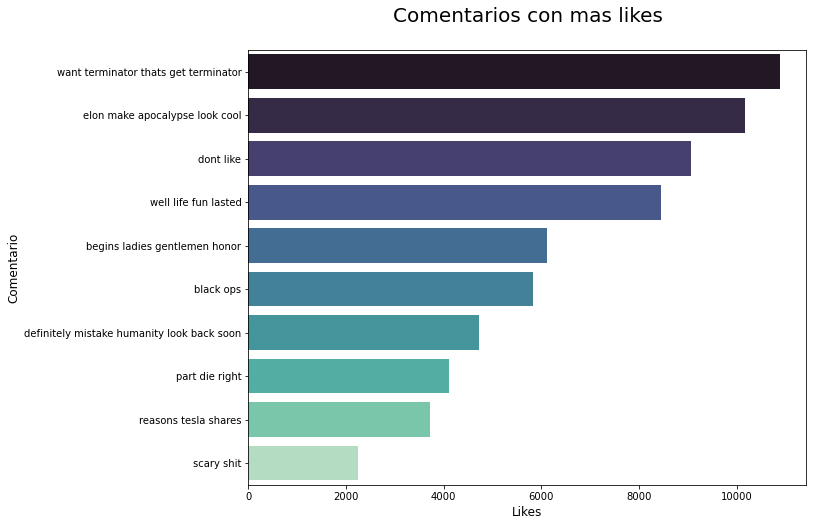

In [102]:
plt.figure(figsize=(10, 8))
sns.barplot(x=d['likes_count'].tolist(), y=d['text'].tolist(), orient='h', palette='mako')
plt.title('Comentarios con mas likes\n', fontsize=20)
plt.xlabel('Likes', fontsize=12)
plt.ylabel('Comentario', fontsize=12)
plt.show()

Obtenemos los usuarios que mas comentarios postearon el dia del lanzamiento.

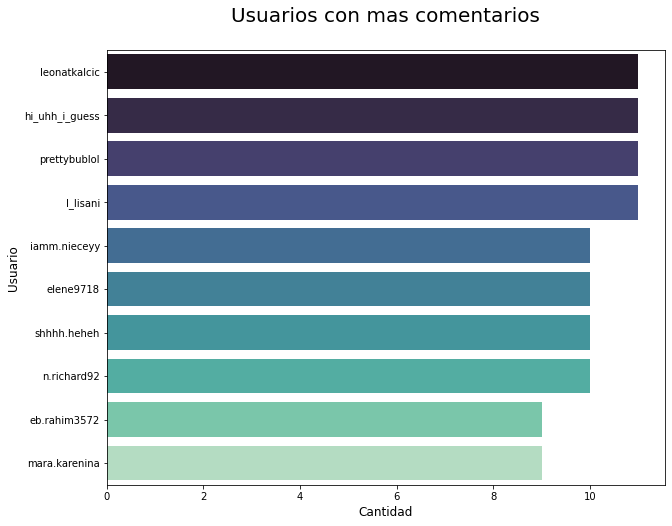

In [103]:
r = pd.json_normalize(instaComments['owner'])
plt.figure(figsize=(10, 8))
username = r['username'].value_counts().nlargest(10)
sns.barplot(x=username.tolist(), y=username.index, orient='h', palette='mako')
plt.title('Usuarios con mas comentarios\n', fontsize=20)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Usuario', fontsize=12)
plt.show()

Realizamos una nube de palabras en general.

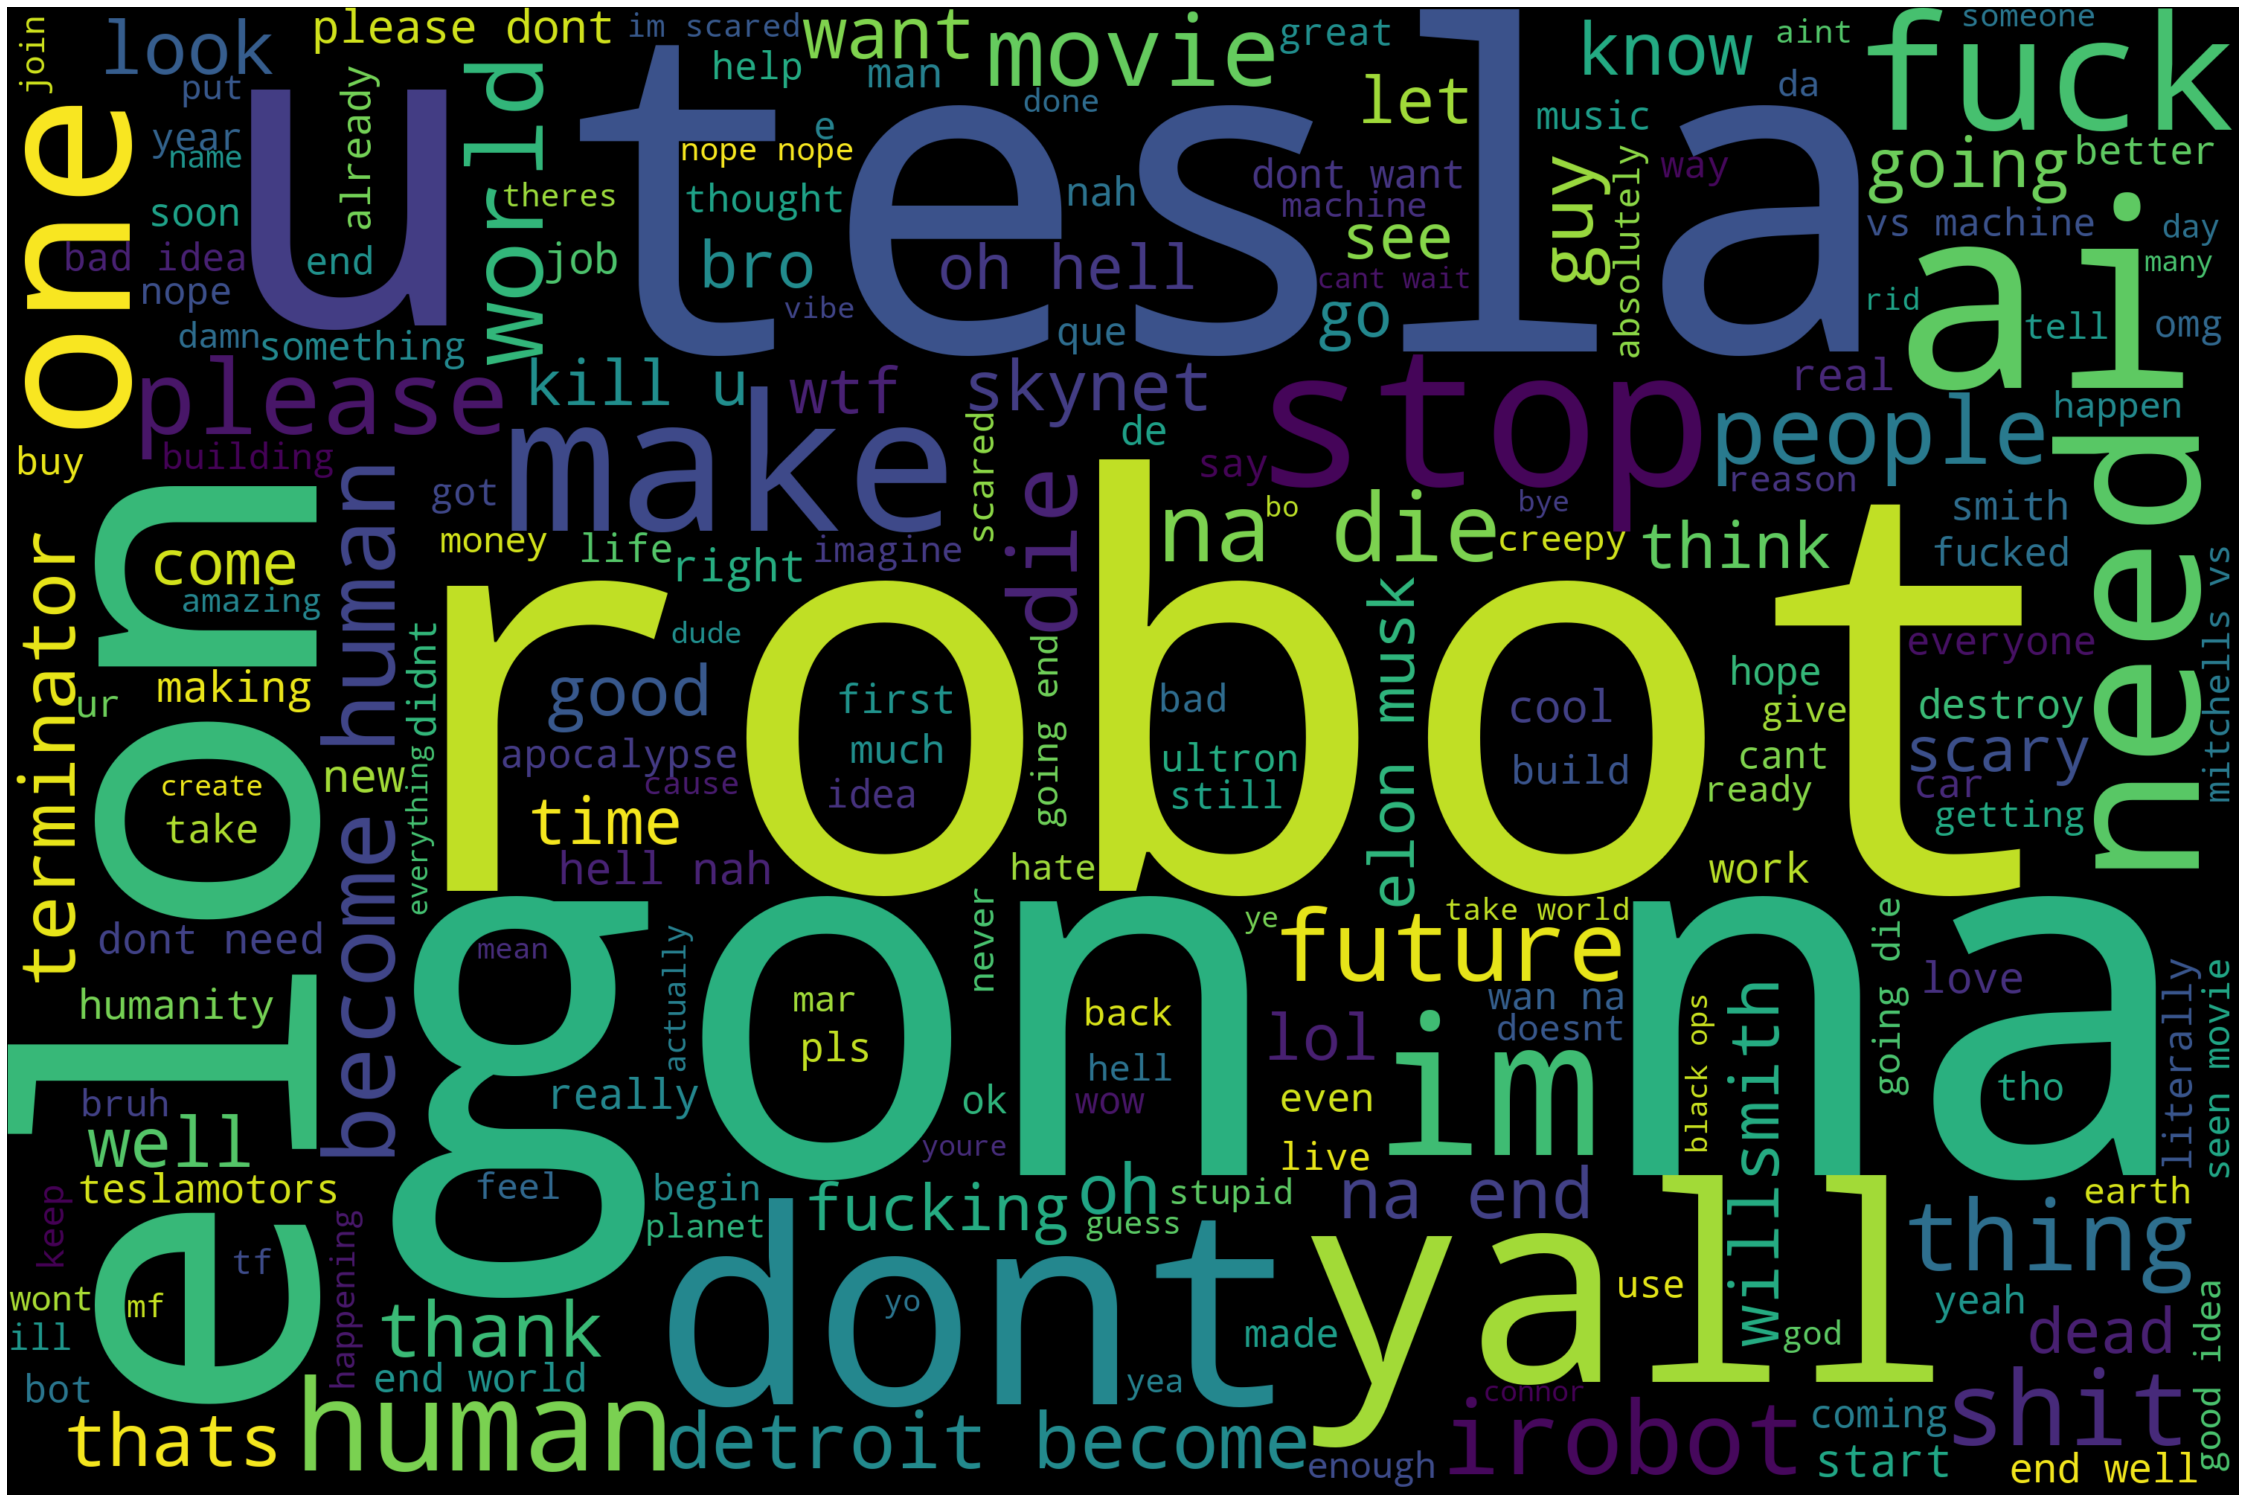

In [104]:
comments = instaComments['text'].str.split(' ')
comments_text = [" ".join(word) for word in comments]
all_texts = " ".join(comments_text)

wordcloud_text = WordCloud(width = 3000, height = 2000).generate(all_texts)

fig = plt.figure(figsize = (40, 30),)

plt.imshow(wordcloud_text, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Análisis

Obtememos los comentarios de los usuarios verificados para saber cual es el comentario de las personas influyentes en redes sociales.

In [105]:
ver_usrname = r.loc[r['is_verified']==True]['username']
ver_text = instaComments.loc[r['is_verified']==True]['text']
df_ver = pd.DataFrame({"Verified User": ver_usrname, "Comment": ver_text})

df_ver = df_ver[df_ver['Comment'] != ""]
first_df_ver = df_ver[['Verified User', 'Comment']][:20]
first_df_ver[:10]

Verified User                      Comment
5335     lethalshooter                       future
5462          paulhart               need fpinsoles
6390          kilprity          whatever vaccinated
6434   diegovaloficial                   hell noooo
6822  avatradeofficial        popular stock traders
7365             felly                           im
7517      adamfreeland         need talk soundtrack
7589         omarsamra                    good boys
7980    chucklesgarage             im calling smith
8354       cre8tivegod  robot surrogates type stuff

Realizamos un análisis de sentimientos para saber que transmiten los comentarios acerca del Tesla Bot el dia del lanzamiento.

In [106]:
def sentiment(word): 
    if TextBlob(word).sentiment.polarity > 0: 
        return 'positive'
    elif TextBlob(word).sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [107]:
sentiment_ = instaComments['text'].apply(lambda x: sentiment(x))
sentiment_t = tweets['Text'].apply(lambda x: sentiment(x))

In [108]:
sentiment_, sentiment_t

(0         neutral
 1         neutral
 2         neutral
 3         neutral
 4         neutral
            ...   
 15124     neutral
 15125     neutral
 15126    positive
 15127     neutral
 15128    positive
 Name: text, Length: 15129, dtype: object,
 0        neutral
 1        neutral
 2        neutral
 3       positive
 4       positive
           ...   
 2512    negative
 2513    positive
 2514    positive
 2515    negative
 2516     neutral
 Name: Text, Length: 2517, dtype: object)

In [109]:
instaComments['sentiment'] = sentiment_
filter_ = instaComments[['text', 'sentiment']]

tweets['Sentiment'] = sentiment_t
filter_t = tweets[['Text', 'Sentiment']]

Obtenemos los comentarios positivos y realizamos un conteo tanto de los comentarios del dia del lanzamiento como de los tweets que han realizado las personas con el paso del tiempo.

In [110]:
positive = sentiment_[sentiment_ == 'positive']
positive_t = sentiment_t[sentiment_t == 'positive']
print("Comentarios lanzamiento: ", len(positive), " | Tweets: ", len(positive_t)) 

Comentarios lanzamiento:  2426  | Tweets:  1162


In [111]:
df_sent = filter_[sentiment_ == 'positive']['sentiment']
df_sent_txt = filter_[sentiment_ == 'positive']['text']

df_txt_sent = pd.DataFrame({"Comment": df_sent_txt, "Sentiment": df_sent})
df_txt_sent

Comment Sentiment
5                               one wants put back came  positive
15                                                 calm  positive
18                                  music sound like bo  positive
21                         well fun lasted goodbye guys  positive
27     first time wish elon didnt money whatever wanted  positive
...                                                 ...       ...
15097                                             great  positive
15111                                              cool  positive
15117                                     first comment  positive
15126                                   positive energy  positive
15128                                     looks amazing  positive

[2426 rows x 2 columns]

Realizamos una nube de palabras de los textos de sentimiento positivo para observar lo mas comun.

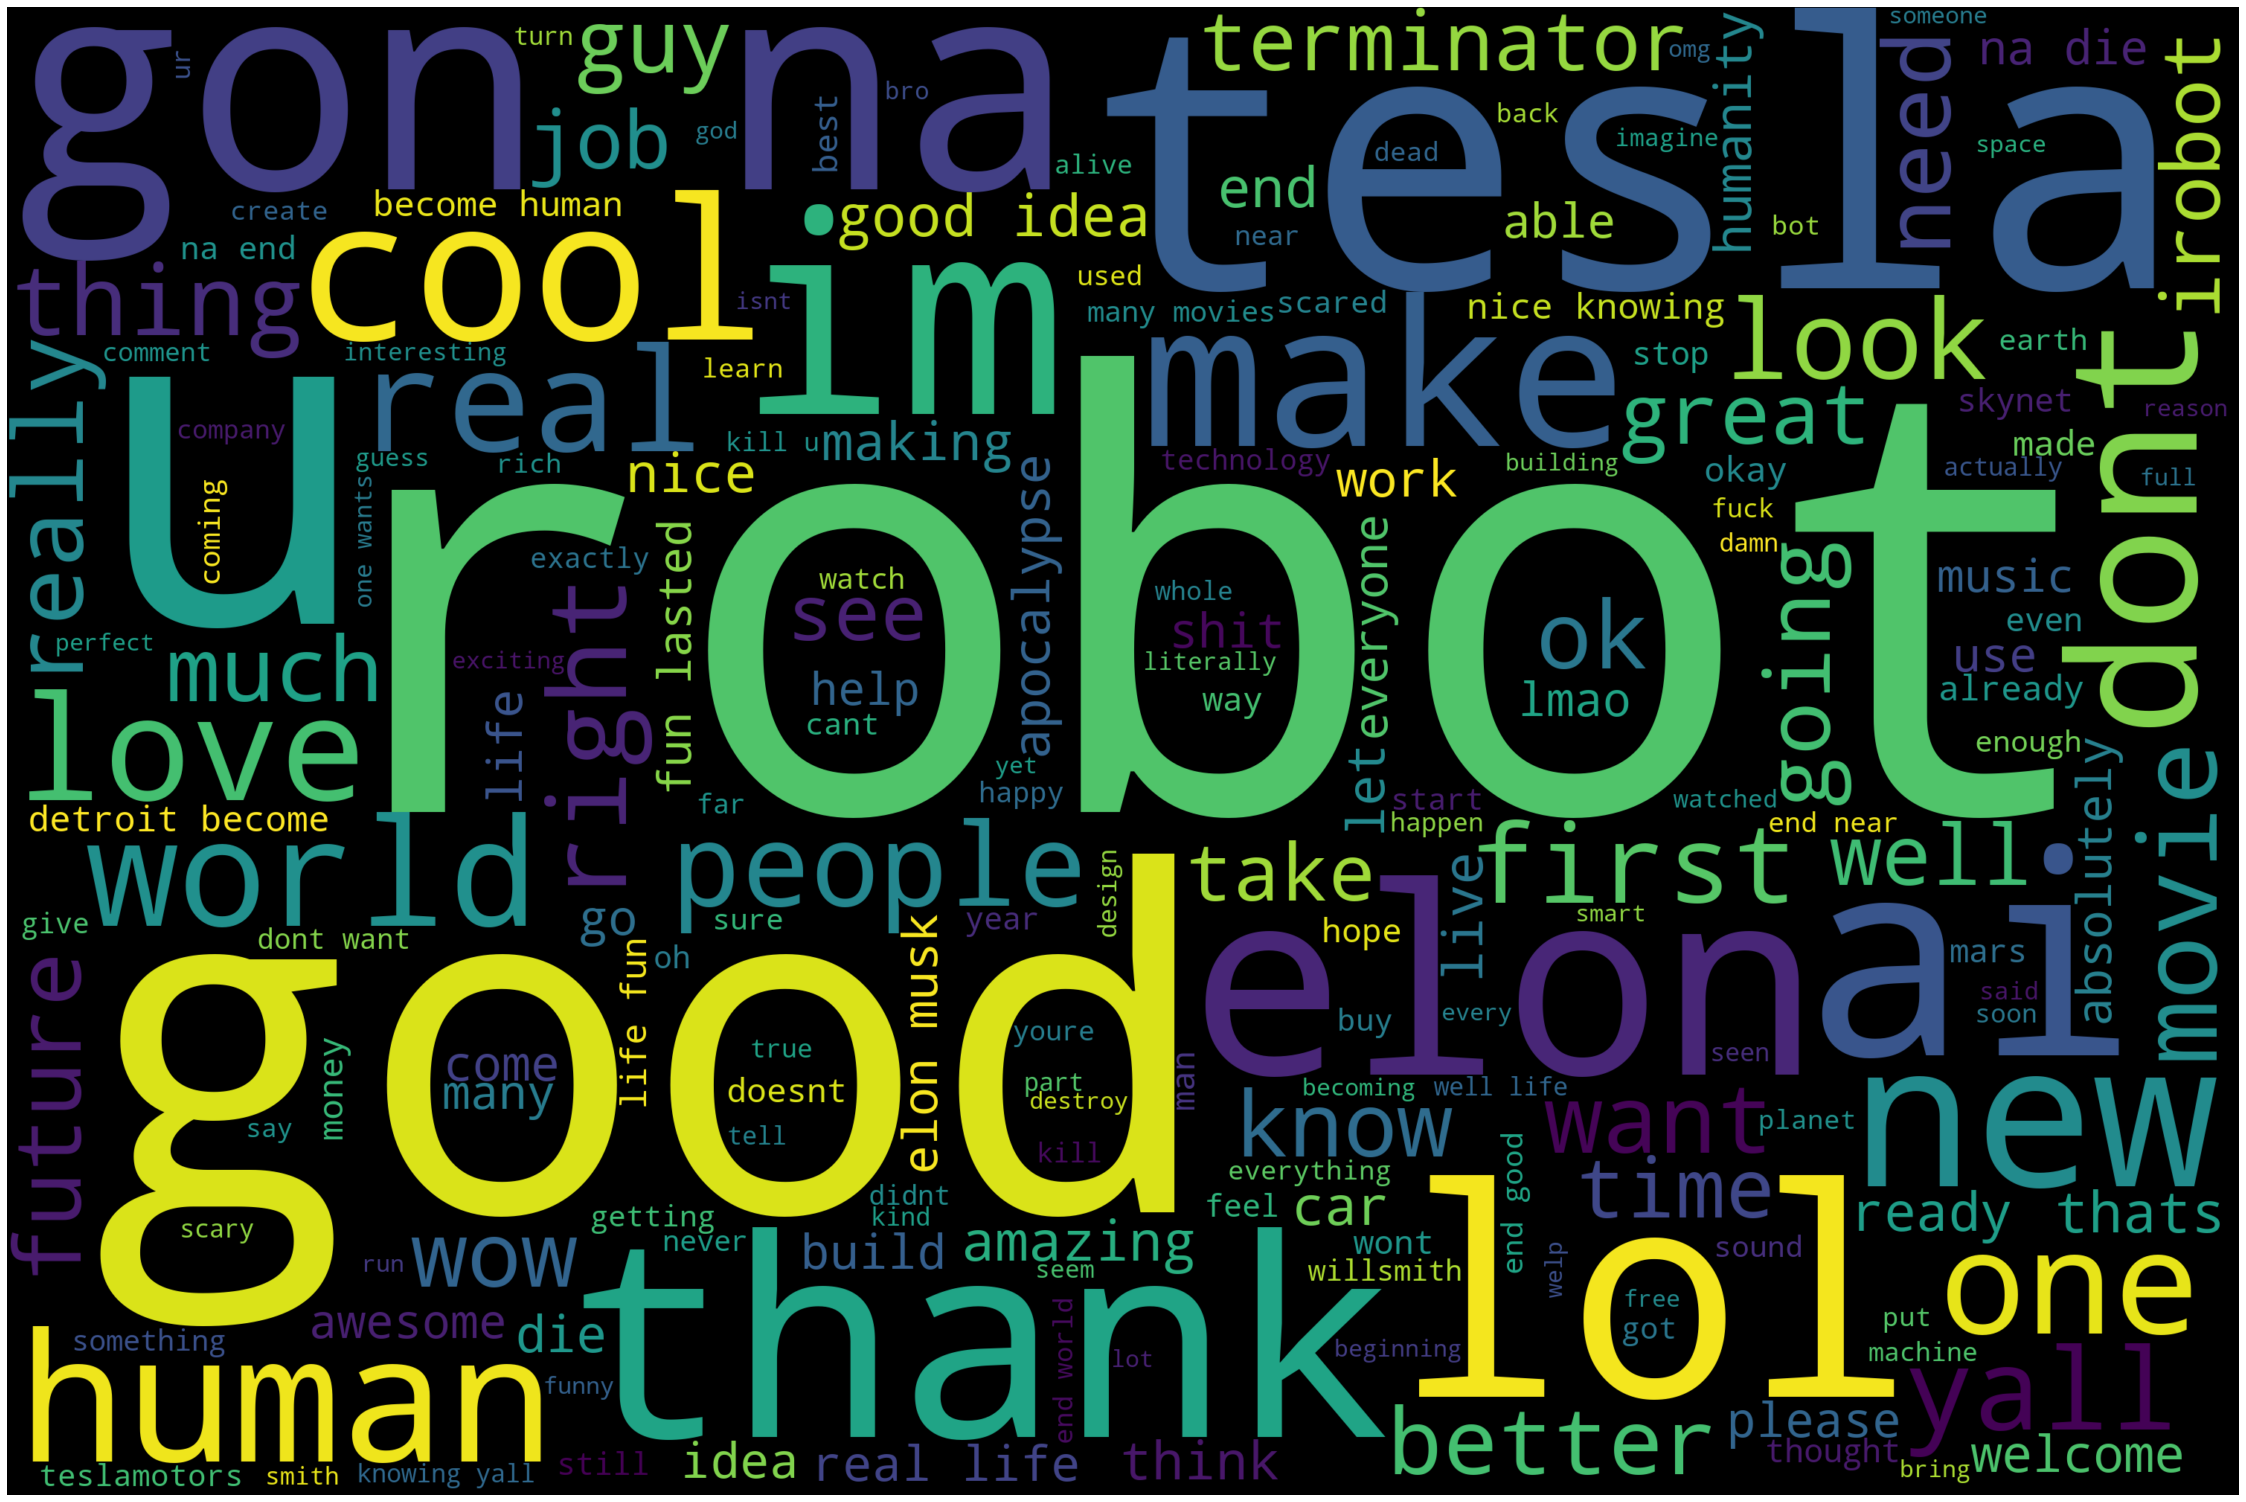

In [112]:
comments = df_sent_txt.str.split(' ')
comments_text = [" ".join(word) for word in comments]
all_ = " ".join(comments_text)

wordcloud_text = WordCloud(width = 3000, height = 2000, background_color = 'black').generate(all_)
fig = plt.figure(figsize = (40, 30))

plt.imshow(wordcloud_text, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Con la misma descripción anterior, lo realizamos para todos aquellos de sentimiento neutral y tambien realizamos su respectiva nube de palabras.

In [113]:
neutral = sentiment_[sentiment_ == 'neutral']
neutral_t = sentiment_t[sentiment_t == 'neutral']
print("Comentarios lanzamiento: ", len(neutral), " | Tweets: ", len(neutral_t)) 


Comentarios lanzamiento:  10545  | Tweets:  1160


In [114]:
df_sent = filter_[sentiment_ == 'neutral']['sentiment']
df_sent_txt = filter_[sentiment_ == 'neutral']['text']

df_txt_sent = pd.DataFrame({"Comment": df_sent_txt, "Sentiment": df_sent})
df_txt_sent

Comment Sentiment
0                         cant end well   neutral
1                                 credo   neutral
2                   nahhhh end bye yall   neutral
3                         beginning end   neutral
4                              bantesla   neutral
...                                 ...       ...
15122                                     neutral
15123                  need braid salon   neutral
15124  alguien puede dejarme embarazada   neutral
15125                                     neutral
15127                                     neutral

[10545 rows x 2 columns]

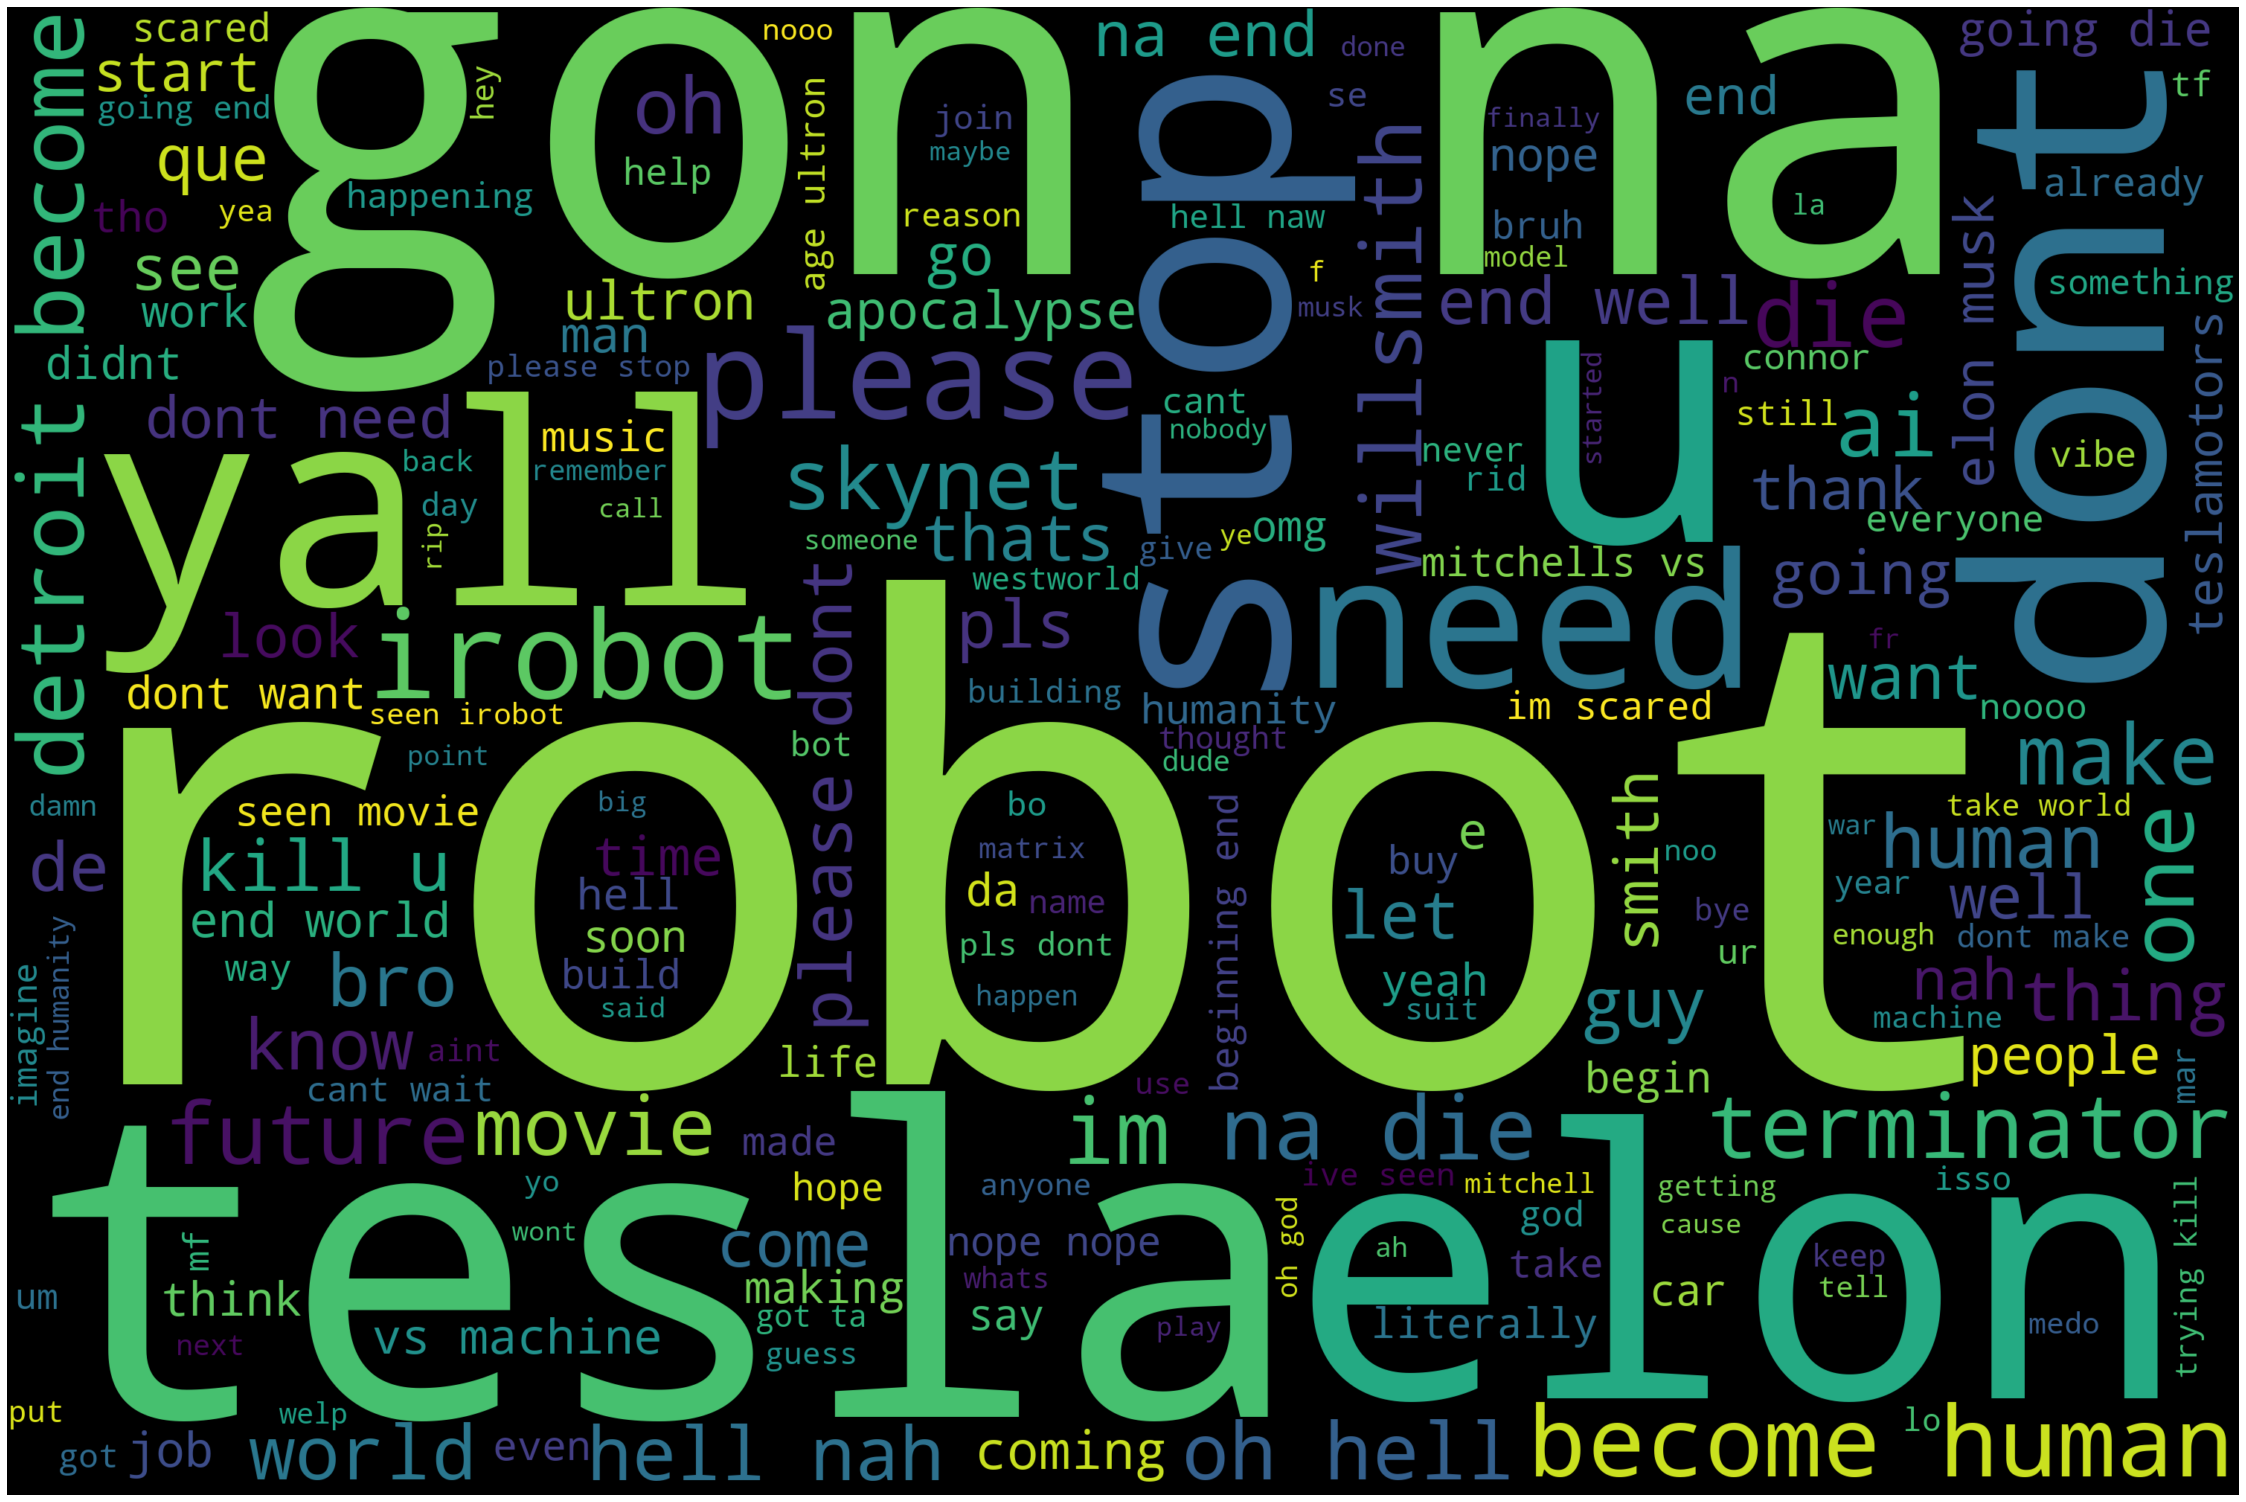

In [115]:
comments = df_sent_txt.str.split(' ')
comments_text = [" ".join(word) for word in comments]
all_ = " ".join(comments_text)

wordcloud_text = WordCloud(width = 3000, height = 2000, background_color = 'black').generate(all_)
fig = plt.figure(figsize = (40, 30))

plt.imshow(wordcloud_text, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Y pot ultimo, los de sentimiento negativo, siempre con su respectiva nube de palabras.

In [116]:
negative = sentiment_[sentiment_ == 'negative']
negative_t = sentiment_t[sentiment_t == 'negative']
print("Comentarios lanzamiento: ", len(negative), " | Tweets: ", len(negative_t)) 


Comentarios lanzamiento:  2158  | Tweets:  195


In [117]:
df_sent = filter_[sentiment_ == 'negative']['sentiment']
df_sent_txt = filter_[sentiment_ == 'negative']['text']

df_txt_sent = pd.DataFrame({"Comment": df_sent_txt, "Sentiment": df_sent})
df_txt_sent

Comment Sentiment
10     ill see yall soon im planet  negative
19                  tesla u stupid  negative
24               excuse kill thing  negative
32                            fuck  negative
33          wtf tesla want kill us  negative
...                            ...       ...
15051                         sick  negative
15054                   boring bot  negative
15083       music makes much worse  negative
15118           creepy looking ngl  negative
15120                    black ops  negative

[2158 rows x 2 columns]

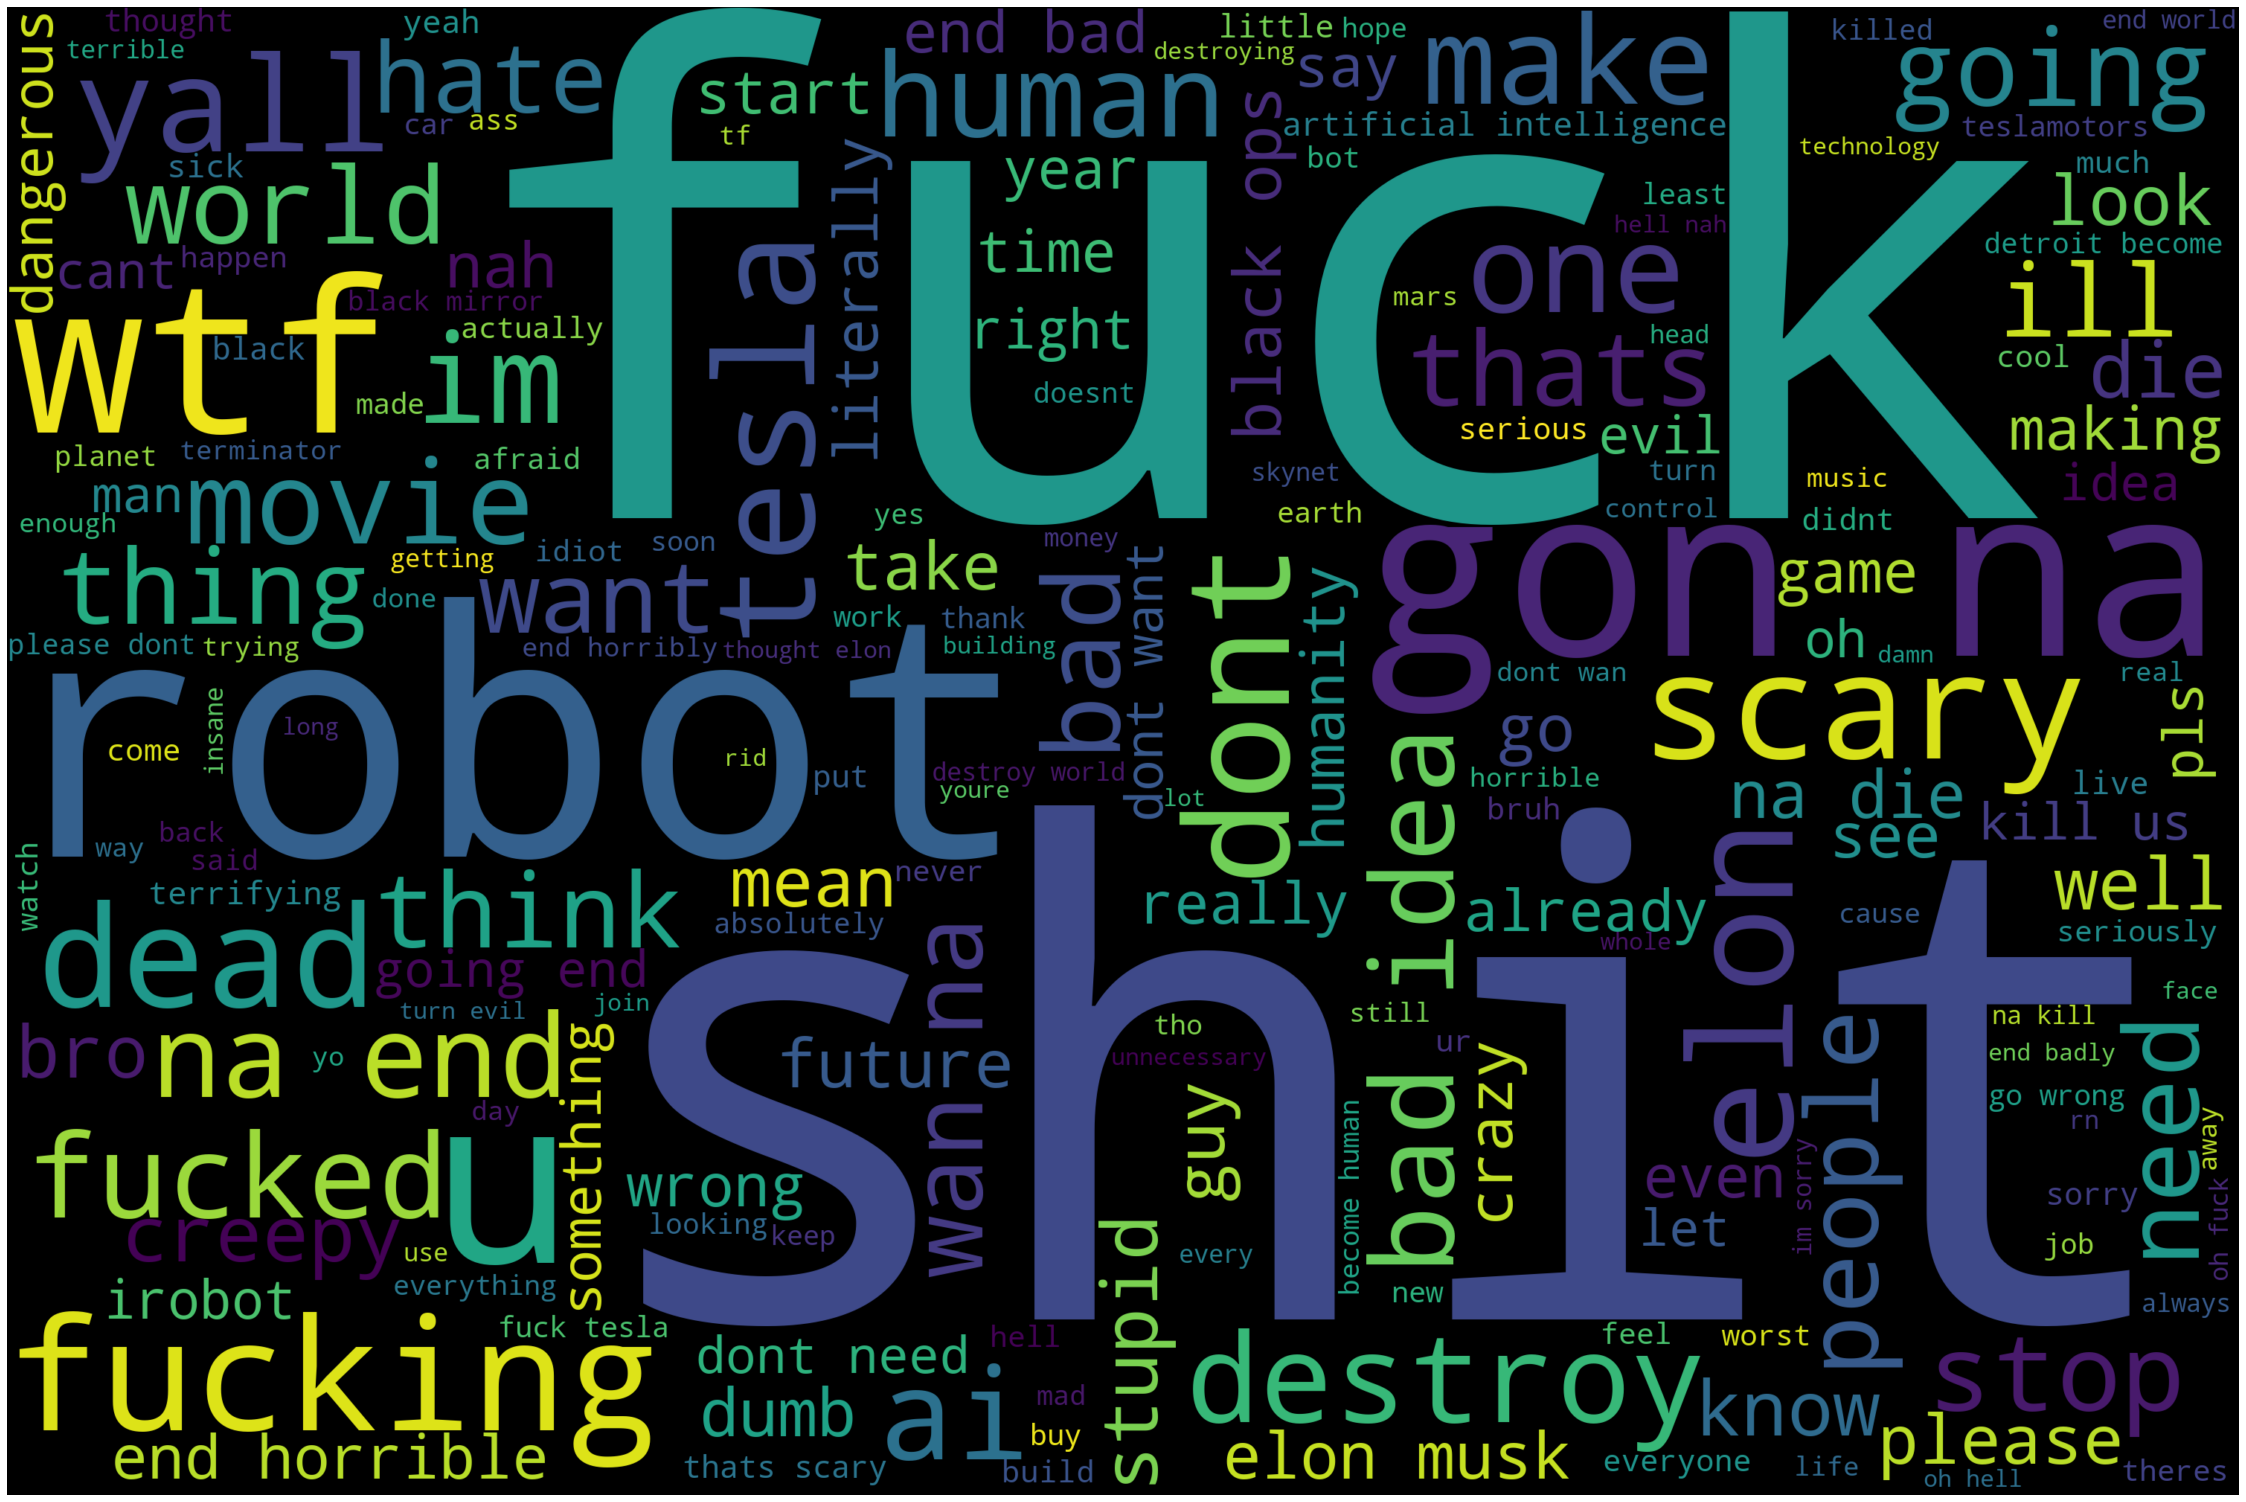

In [118]:
comments = df_sent_txt.str.split(' ')
comments_text = [" ".join(word) for word in comments]
all_ = " ".join(comments_text)

wordcloud_text = WordCloud(width = 3000, height = 2000, background_color = 'black').generate(all_)
fig = plt.figure(figsize = (40, 30))

plt.imshow(wordcloud_text, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Discusión

- Al observar los comentarios con más likes podemos observar que predomina el hecho de que se esta creando un producto tipo "Terminator" que nos llevará al apocalipsis, algo no necesario y que produce miedo. Esto transmite el miedo que el publico tiene, como primere impresión, del producto.
-  En el conteo general de las palabras mas comúnes, de todo el dataset de los comentarios de instagram el dia del lanzamiento (que son los mas importantes ya que los tweets no son precisamente del dia del lanzamiento), se puede observar que predomina a una escala media, palabras como "stop", "don't", "die", "end" y malas expresiones, lo que tambien nos transmite que el producto no es de mucho agrado para los usuarios.
- En relación a los comentarios realizados por los usuarios verificado, que son unicamente 10, no se puede inferir ninguna posición con respecto a la aceptación del producto ya que, en su mayoría, son comentarios poco relacionados al producto.
- Al realizar un análisis de sentimintos, y filtrar la cantidad de comentarios por sentimiento tenemos que los comentarios positivos son 2,426 el dia del lanzamiento y 1,162 tweets de comentarios de personas con el paso del tiempo luego del lanzamiento, mientras que para el sentimiento neutral es de un total de 10,545 y 1,160 mientras que de negativo se obtuvo un total de 2,158 y 195. Podemos inferir que al tener comentarios negativos casi tanto como los positivos y una gran cantidad de comentarios neutrales en donde si se les observa detenidamente existen muchos de poca aceptación, por lo que no pinta que sea un producto que vaya a tener mucho éxito.
. Las palabras que predominan para comentarios positivos son: "good", "robot", "tesla", "elon", "cool", "love", "thank"; neutral: "yall", "tesla", "robot", "kill", "nah"; negativo: "fu***", "sh***", "fu***ing", "destroy", "scary", "wtf", "dead", "horrible".

## Conclusiones

- Los comentarios del lanzamiento no son del todo positivo para el producto de Tesla Bot, posiblemente porque a los usuarios les trasnmitió miedo.
- A pesar que los comentarios del lanzamiento son mas negativos/neutrales, con los tweets cambia por lo que puede que el público esté cambiando de opinion.
- Predomina una posición neutra por lo que no se puede considerar como un buen lanzamiento de producto.

## Recomendación

Si se tuviera que presentar una recomendación a la empresa para que cuando el producto esté listo para la venta tenga una mejor aceptación, se recomendaría trabajar en transmitir a su publico el motivo de porque su producto es útil pero en especial como este producto no tiene libre locomoción o los motivos por los cuales no se le debe tener miedo.